# Project 2: Classification and Regression
## MSDS 7331 Data Mining Section 404
## 7/9/2017

### Chris Irwin, Damon Resnick, Josh Klein, Anna Frowein

## Introduction

In this project, we run analyses on the Kaggle Zillow data set "Zillow Prize: Zillow’s Home Value Prediction (Zestimate)" that we used in the first project and mini-lab. This data set was used to preform two tasks. Task One: The data is classified into two groups, houses with a garage and houses without a garage.  Task Two: The tax value of each house is predicted with the relevant attributes using multiple methods.


## Data Preparation

### Part 1: Data Defintion

Specifically, the dataset used is a merged set of properties_2016.csv and train_2016.cvs from the Zillow Prize: Zillow's Home Value Prediction (Zestimate) Kaggle competition.  The dataset contains all properties from Los Angeles County, Orange County, and Ventura County in California, along with the home features for 2016. The data is provided by Zillow with what was gathered through public records and through user entered data points. 

The data set from Kaggle has 58 variables describing the different features or characteristics of a home, including number of bedrooms, location detail, square footage, number of bathrooms, type of heating/cooling systems, ect. The following table has the list of attributes and their descriptions as provided by Zillow in their data dictionary, found on Kaggle.  

|Feature                      |Description                                                                          |
|-----------------------------|-------------------------------------------------------------------------------------|
|'airconditioningtypeid'      |Type of cooling system present in the home (if any)                                  |
|'architecturalstyletypeid'   |Architectural style of the home (i.e. ranch, colonial, split-level, etc…)            |
|'basementsqft'	              |Finished living area below or partially below ground level                           |
|'bathroomcnt'	              | Number of bathrooms in home including fractional bathrooms                          |
|'bedroomcnt'	              |Number of bedrooms in home                                                           |
|'buildingqualitytypeid'      |Overall assessment of condition of the building from best (lowest) to worst(highest) |
|'buildingclasstypeid'	      |The building framing type (steel frame, wood frame, concrete/brick)                  |
|'calculatedbathnbr'	      |Number of bathrooms in home including fractional bathroom                            |
|'decktypeid'	              |Type of deck (if any) present on parcel                                              |
|'threequarterbathnbr'	      |Number of 3/4 bathrooms in house (shower + sink + toilet)                            |
|'finishedfloor1squarefeet'   |Size of the finished living area on the first (entry) floor of the home              |
|'calculatedfinishedsquarefeet|Calculated total finished living area of the home                                    |
|'finishedsquarefeet6'	      |Base unfinished and finished area                                                    |
|'finishedsquarefeet12'	      |Finished living area                                                                 |
|'finishedsquarefeet13'	      |Perimeter  living area                                                               |
|'finishedsquarefeet15'	      |Total area                                                                           |
|'finishedsquarefeet50'	      |Size of the finished living area on the first (entry) floor of the home              |
|'fips'	                      |Federal Information Processing Standard                                              |
|-----------------------------|code-see https://en.wikipedia.org/wiki/FIPS_county_code                              |
|'fireplacecnt'	              |Number of fireplaces in a home (if any)                                              |
|'fireplaceflag'	          |Is a fireplace present in this home                                                  |
|'fullbathcnt'	              |Number of full bathrooms (sink, shower + bathtub, and toilet) present in home        |
|'garagecarcnt'	              |Total number of garages on the lot including an attached garage                      |
|'garagetotalsqft'	          |Total number of square feet of all garages on lot including an attached garage       |
|'hashottuborspa'	          |Does the home have a hot tub or spa                                                  |
|'heatingorsystemtypeid'	  |Type of home heating system                                                          |
|'latitude'	                  |Latitude of the middle of the parcel multiplied by 10e6                              |
|'longitude'	              |Longitude of the middle of the parcel multiplied by 10e6                             |
|'lotsizesquarefeet'	      |Area of the lot in square feet                                                       |
|'numberofstories'	          |Number of stories or levels the home has                                             |
|'parcelid'	                  |Unique identifier for parcels (lots)                                                 |
|'poolcnt'	                  |Number of pools on the lot (if any)                                                  |
|'poolsizesum'	              |Total square footage of all pools on property                                        |
|'pooltypeid10'	              |Spa or Hot Tub                                                                       |
|'pooltypeid2'	              |Pool with Spa/Hot Tub                                                                |
|'pooltypeid7'	              |Pool without hot tub                                                                 |
|'propertycountylandusecode'  |County land use code i.e. it's zoning at the county level                            |
|'propertylandusetypeid'	  |Type of land use the property is zoned for                                           |
|'propertyzoningdesc'	      |Description of the allowed land uses (zoning) for that property                      |
|'rawcensustractandblock'	  |Census tract and block ID combined-also contains blockgroup assignment by extension  |
|'censustractandblock'	      |Census tract and block ID combined - also contains blockgroup assignment by extension|
|'regionidcounty'	          |County in which the property is located                                              |
|'regionidcity'	              |City in which the property is located (if any)                                       |
|'regionidzip'	              |Zip code in which the property is located                                            |
|'regionidneighborhood'	      |Neighborhood in which the property is located                                        |
|'roomcnt'	                  |Total number of rooms in the principal residence                                     |
|'storytypeid'	              |Type of floors in a multi-story house                                                |
|-----------------------------|(i.e. basement and main level, split-level, attic, etc.).  See tab for details.      |
|'typeconstructiontypeid'	  |What type of construction material was used to construct the home                    |
|'unitcnt'	                  |Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)   |
|'yardbuildingsqft17'	      |Patio in  yard                                                                       |
|'yardbuildingsqft26'	      |Storage shed/building in yard                                                        |
|'yearbuilt'	              |The Year the principal residence was built                                           |
|'taxvaluedollarcnt'	      |The total tax assessed value of the parcel                                           |
|'structuretaxvaluedollarcnt' |The assessed value of the built structure on the parcel                              |
|'landtaxvaluedollarcnt'	  |The assessed value of the land area of the parcel                                    |
|'taxamount'	              |The total property tax assessed for that assessment year                             |
|'assessmentyear'	          |The year of the property tax assessment                                              |
|'taxdelinquencyflag'	      |Property taxes for this parcel are past due as of 2015                               |
|'taxdelinquencyyear'	      |Year for which the unpaid property taxes were due                                    |

In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import StratifiedKFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
#dfAttributeData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 
dfAttributeData = pd.read_csv('/Users/joshuaklein/Desktop/properties_2016.csv')

#dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')
dfTrainingData = pd.read_csv('/Users/joshuaklein/Desktop/train_2016_v2.csv')

#Create new data set that contains both the data zillow and the data to train against
dfZillowData = pd.merge(dfTrainingData, dfAttributeData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfAttributeData


#Get the headers to ensure all columns are included.
dfZillowData.head(10)

/Users/joshuaklein/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [5]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2', 'pooltypeid10']].where(dfZillowData[['hashottuborspa','pooltypeid2','pooltypeid10']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#storytypeid
dummies = pd.get_dummies(dfForModel['storytypeid']).rename(columns=lambda x: 'StoryTypeId' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['storytypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

dfZillowDataNumeric.head(10)

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0,StoryTypeId7.0,StoryTypeId24.0,hasgarage
0,11016594,0.0276,1.0,7.0,0.0,2.0,3.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,0,1,1
1,14366692,-0.1684,5.0,7.0,0.0,3.5,4.0,4.0,7.0,3.5,...,0,0,0,0,0,0,0,0,1,1
2,12098116,-0.0040,1.0,7.0,0.0,3.0,2.0,4.0,4.0,3.0,...,0,0,0,0,0,0,0,0,1,1
3,12643413,0.0218,1.0,7.0,0.0,2.0,2.0,4.0,4.0,2.0,...,0,0,0,1,0,0,0,0,1,1
4,14432541,-0.0050,5.0,7.0,0.0,2.5,4.0,4.0,7.0,2.5,...,0,0,0,0,0,0,0,0,1,1
5,11509835,-0.2705,1.0,7.0,0.0,4.0,4.0,4.0,1.0,4.0,...,0,0,0,0,0,0,0,0,1,1
6,12286022,0.0440,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0,0,0,0,0,0,0,0,1,1
7,17177301,0.1638,5.0,7.0,0.0,2.5,3.0,4.0,7.0,2.5,...,0,0,0,1,0,0,0,0,1,1
8,14739064,-0.0030,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0,0,0,1,0,0,0,0,1,1
9,14677559,0.0843,5.0,7.0,0.0,2.0,2.0,4.0,7.0,2.0,...,0,0,0,1,0,0,0,0,1,1


### Part 2: Final Data Set

<table>
<tr><td><b>Feature</b></td><td><b>Description</b></td><td><b>Data Type</b></td></tr>
<tr><td>'parcelid'</td><td>Unique identifier for parcels (lots)</td><td>int64</td></tr>
<tr><td>'airconditioningtypeid'</td><td>Type of cooling system present in the home (if any)</td><td>float64</td></tr>
<tr><td>'architecturalstyletypeid'</td><td>Architectural style of the home (i.e. ranch, colonial, split-level, etc…)</td><td>float64</td></tr>
<tr><td>'basementsqft'</td><td>Finished living area below or partially below ground level</td><td>float64</td></tr>
<tr><td>'bathroomcnt'</td><td>Number of bathrooms in home including fractional bathrooms</td><td>float64</td></tr>
<tr><td>'bedroomcnt'</td><td>Number of bedrooms in home</td><td>float64</td></tr>
<tr><td>'buildingclasstypeid'</td><td>The building framing type (steel frame, wood frame, concrete/brick)</td><td>float64</td></tr>
<tr><td>'buildingqualitytypeid'</td><td>Overall assessment of building condition from best (lowest) to worst(highest)</td><td>float64</td></tr>
<tr><td>'calculatedbathnbr'</td><td>Number of bathrooms in home including fractional bathroom</td><td>float64</td></tr>
<tr><td>'decktypeid'</td><td>Type of deck (if any) present on parcel</td><td>float64</td></tr>
<tr><td>'finishedfloor1squarefeet'</td><td>Size of the finished living area on the first (entry) floor of the home	</td><td>float64</td></tr>
<tr><td>'calculatedfinishedsquarefeet</td><td>Calculated total finished living area of the home</td><td>float64</tr>
<tr><td>'finishedsquarefeet12'</td><td>Finished living area</td><td>float64</td></tr>
<tr><td>'finishedsquarefeet13'</td><td>Perimeter living area</td><td>float64</td></tr>
<tr><td>'finishedsquarefeet15'</td><td>Total area</td><td>float64</td></tr>
<tr><td>'finishedsquarefeet50'</td><td>Size of the finished living area on the first (entry) floor of the home</td><td>float64</td></tr>
<tr><td>'finishedsquarefeet6'</td><td>Base unfinished and finished area</td><td>float64</td></tr>
<tr><td>'fips'</td><td>Federal Information Processing Standard</td><td>float64</td></tr>
<tr><td>'fireplacecnt'</td><td>Number of fireplaces in a home (if any)</td><td>float64</td></tr>
<tr><td>'fullbathcnt'</td><td>Number of full bathrooms (sink, shower + bathtub, and toilet) present in home</td><td>float64</td></tr>
<tr><td>'garagecarcnt'</td><td>Total number of garages on the lot including an attached garage</td><td>float64</td></tr>
<tr><td>'garagetotalsqft'</td><td>Total number of square feet of all garages on lot including an attached garage</td><td>float64</td></tr>
<tr><td>'hashottuborspa'</td><td>Does the home have a hot tub or spa</td><td>int64</td></tr>
<tr><td>'heatingorsystemtypeid'</td><td>Type of home heating system</td><td>float64</td></tr>
<tr><td>'latitude'</td><td>Latitude of the middle of the parcel multiplied by 10e6</td><td>float64</td></tr>
<tr><td>'longitude'</td><td>Longitude of the middle of the parcel multiplied by 10e6</td><td>float64</td></tr>
<tr><td>'lotsizesquarefeet'</td><td>Area of the lot in square feet</td><td>float64</td></tr>
<tr><td>'poolcnt'</td><td>Number of pools on the lot (if any)</td><td>float64</td></tr>
<tr><td>'poolsizesum'</td><td>Total square footage of all pools on property</td><td>float64</td></tr>
<tr><td>'pooltypeid10'</td><td>Spa or Hot Tub</td><td>float64</td></tr>
<tr><td>'pooltypeid2'</td><td>Pool with Spa/Hot Tub</td><td>float64</td></tr>
<tr><td>'pooltypeid7'</td><td>Pool without hot tub</td><td>float64</td></tr>
<tr><td>'propertylandusetypeid'</td><td>Type of land use the property is zoned for</td><td>float64</td></tr>
<tr><td>'rawcensustractandblock'</td><td>Census tract and block ID combined-also contains blockgroup assignment by extension</td><td>float64</td></tr>
<tr><td>'regionidcity'</td><td>City in which the property is located (if any)</td><td>float64</td></tr>
<tr><td>'regionidcounty'</td><td>County in which the property is located</td><td>float64</td></tr>
<tr><td>'regionidneighborhood'</td><td>Neighborhood in which the property is located</td><td>float64</td></tr>
<tr><td>'regionidzip'</td><td>Zip code in which the property is located</td><td>float64</td></tr>
<tr><td>'roomcnt'</td><td>Total number of rooms in the principal residence</td><td>float64</td></tr>
<tr><td>'storytypeid'</td><td>Type of floors in a multi-story house</td><td>float64</td></tr>
<tr><td>'threequarterbathnbr'</td><td>Number of 3/4 bathrooms in house (shower + sink + toilet)</td><td>float64</td></tr>
<tr><td>'typeconstructiontypeid'</td><td>What type of construction material was used to construct the home</td><td>float64</td></tr>
<tr><td>'unitcnt'</td><td>Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)</td><td>float64</td></tr>
<tr><td>'yardbuildingsqft17'</td><td>Patio in yard</td><td>float64</td></tr>
<tr><td>'yardbuildingsqft26'</td><td>Storage shed/building in yard</td><td>float64</td></tr>
<tr><td>'yearbuilt'</td><td>The Year the principal residence was built</td><td>float64</td></tr>
<tr><td>'numberofstories'</td><td>Number of stories or levels the home has</td><td>float64</td></tr>
<tr><td>'structuretaxvaluedollarcnt'</td><td>The assessed value of the built structure on the parcel</td><td>float64</td></tr>
<tr><td>'taxvaluedollarcnt'</td><td>The total tax assessed value of the parcel</td><td>float64</td></tr>
<tr><td>'assessmentyear'</td><td>The year of the property tax assessment</td><td>float64</td></tr>
<tr><td>'landtaxvaluedollarcnt'</td><td>The assessed value of the land area of the parcel</td><td>float64</td></tr>
<tr><td>'taxamount'</td><td>The total property tax assessed for that assessment year</td><td>float64</td></tr>
<tr><td>'taxdelinquencyyear'</td><td>Year for which the unpaid property taxes were due</td><td>float64</td></tr>
<tr><td>'censustractandblock'</td><td>Census tract and block ID combined - also contains blockgroup assignment by extension</td><td>float64</td></tr>
<tr><td>'hasbasement'</td><td>New variable to denote if the property has a basement</td><td>int64</td></tr>
<tr><td>'hasdeck'</td><td>New variable to denote if the property has a deck</td><td>int64</td></tr>
<tr><td>'hasfireplace'</td><td>New variable to denote if the property has a fireplace</td><td>int64</td></tr>
<tr><td>'haspatio'</td><td>New variable to denote if the property has a patio</td><td>int64</td></tr>
<tr><td>'hasgarage'</td><td>New variable to denote if the property has a garage</td><td>int64</td></tr>
<tr><td>'log10TaxValue'</td><td>The tax value of the property in log10 form</td><td>float64</td></tr>
<tr><td>'HSTypeId_1.0'</td><td>Baseboard heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_2.0'</td><td>Central heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_6.0'</td><td>Forced Air heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_7.0'</td><td>Floor/Wall heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_10.0'</td><td>Gravity heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_11.0'</td><td>Heat pump heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_12.0'</td><td>Hot water heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_13.0'</td><td>No heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_14.0'</td><td>Other type heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_18.0'</td><td>Radiant heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_20.0'</td><td>Solar heating system</td><td>uint8</td></tr>
<tr><td>'HSTypeId_24.0'</td><td>Yes heating system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_1.0'</td><td>Central air conditioning system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_3.0'</td><td>Evaporative cooler air conditioning system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_5.0'</td><td>No air conditioning system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_9.0'</td><td>Refrigeration air conditioning system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_11.0'</td><td>Wall unit air conditioning system</td><td>uint8</td></tr>
<tr><td>'ACTypeId_13.0'</td><td>Yes air conditioning system</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_2.0'</td><td>Bungalow architectural style</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_3.0'</td><td>Cape Cod architectural style</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_7.0'</td><td>Contemporary architectural style</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_8.0'</td><td>Conventional architectural style</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_10.0'</td><td>French Provincial architectural style</td><td>uint8</td></tr>
<tr><td>'ArchStyleTypeId_21.0'</td><td>Ranch/Rambler architectural style</td><td>uint8</td></tr>
<tr><td>'DeckTypeId_66.0'</td><td>Wood deck type</td><td>uint8</td></tr>
<tr><td>'BuildClassTypeId_4.0'</td><td>Buildings having wood or wood and steel frames</td><td>uint8</td></tr>
<tr><td>'ConstructionTypeId_4.0'</td><td>Concrete construction type</td><td>uint8</td></tr>
<tr><td>'ConstructionTypeId_6.0'</td><td>Frame construction type</td><td>uint8</td></tr>
<tr><td>'ConstructionTypeId_13.0'</td><td>Masonry construction type</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_1.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_4.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_6.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_7.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_8.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_10.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_11.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'BuildingQualTypeId_12.0'</td><td>Building quality type ranking 1-12</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_31.0'</td><td>Commercial/Office/Residential mixed land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_47.0'</td><td>Store/Office mixed land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_246.0'</td><td>Duplex land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_247.0'</td><td>Triplex land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_248.0'</td><td>Quadruplex land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_260.0'</td><td>Residential general land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_261.0'</td><td>Single family residential land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_263.0'</td><td>Mobile home land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_264.0'</td><td>Townhouse land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_265.0'</td><td>Cluster home land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_266.0'</td><td>Condominium land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_267.0'</td><td>Cooperative land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_269.0'</td><td>Planned unit development land use type</td><td>uint8</td></tr>
<tr><td>'LandUseTypeId_275.0'</td><td>Manufactured, modular, or prefab land use type</td><td>uint8</td></tr>
<tr><td>'StoryTypeId_7.0'</td><td>Basement story type</td><td>uint8</td></tr>
<tr><td>'StoryTypeId_24.0'</td><td>Single level with attic floor type</td><td>uint8</td></tr>
</table>

Evaluation of the original dataset showed the need to create or recharacterize new variables for inclusion in the analysis:
<ul><b>hasbasement, hasdeck, haspatio, hasgarage</b> - from a practical standpoint we felt the need for a binary indicator for basements, decks, and patios in addtion to the size of these features provided in the original dataset. </ul>
<ul><b>hasfireplace, hashottuborspa</b> - the original fields provided to us from Zillow were incomplete, so we created new flags that took into consideration multiple original fields to create binary indicators for these features.</ul>
<ul><b>log10TaxValue</b> - during exploratory data analysis we found many large outliers in the taxvaluedollarcnt column. We did a log transformation of this variable for uniformity.</ul>
<ul><b>countyname</b> - the original data set includes numerical categorical values for counties, so we have aligned those numerics values to the county names they represent.</ul>
<ul><b>HSTypeId_XX</b> - the original data set has a single column that contains categorical values for heating system. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>ACTypeId_XX</b> - the original data set has a single column that contains categorical values for air conditioning system. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>ArchStyleTypeId_XX</b> - the original data set has a single column that contains categorical values for architectural style. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>DeckTypeId_XX</b> - the original data set has a single column that contains categorical values for deck type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>BuildClassTypeId_XX</b> - the original data set has a single column that contains categorical values for building class type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>ConstructionTypeId_XX</b> - the original data set has a single column that contains categorical values for construction type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>BuildingQualTypeId_XX</b> - the original data set has a single column that contains categorical values for building quality type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>LandUseTypeId_XX</b> - the original data set has a single column that contains categorical values for land use type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>
<ul><b>StoryTypeId_XX</b> - the original data set has a single column that contains categorical values for story type. We created a series of dynamic columns that turns the categories into their own indicator column.</ul>

The final data used to create models has been scaled to accomodate the wide differences between the ranges of the continuous variables.<br>

The original data set contains many columns that contain null values. We have subsitituted the median value for the missing data in the columns:
<ul><b>numberofstories, bathroomcnt, bedroomcnt, fireplacecnt, fullbathcnt, poolcnt, roomcnt, unitcnt, heatingorsystemtypeid, airconditioningtypeid, garagetotalsqft, storytypeid, basementsqft, finishedsquarefeet13, finishedsquarefeet6, finishedsquarefeet15, finishedsquarefeet50, and finishedfloor1squarefeet.</b></ul>

## Modeling and Evaluation

### Modeling and evaluation Part 1: Evaluation Metrics

The confusion matrix and accuracy score from the matrix are used to evaluate the effectiveness of the models for Task 1: Classification of Garage/No Garage.  The confusion matrix shows the number of predictions and breaks them into True Positives, False Positives, True Negatives, and False Negatives.  The accuracy score is calculated by taking the number of correct predations (True Positives and True Negatives) divided by the total number of predictions.  This summarizes how well the model predicts the classification of each instance in the Test dataset.  

In Task 2 the Tax Value is predicted using a R-Squared measure to evaluate the models created for that continuous variable.  R-squared provides one measure of how closely the data fits to a regression line.  This method provides a good evaluation metric in this case, since the data to predict exact values of homes are expected to correlate with the different attributes of a property and its value.  


In [7]:
def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Number of Garages')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)


### Model and Evaluation Part 2: Method of Data Division

A stratified K-fold cross validation with five (5) folds is used, which creates a Train/Test split of 80/20 of the data.  The stratified K-fold method is used here to ensure that the splits or folds created are the same size and hold roughly the same proportions of the class labels.  This "leave one out" approach for cross validation helps to ensure that each record in the original dataset is used at least once in a Train set and at least once in a Test set.  The total error in this method is five (5) runs which is the sum of all the runs of the data.  While this is a computationally expensive way to split the data, it provides a good way to test different models while working to prevent overfitting of a single Train set. 



In [8]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'garagecarcnt' in dfTrainValuesNumeric:
    
    #Get the values for each property
    garageActualValues = dfTrainValuesNumeric['garagecarcnt'].values 
    
    #delete any variables that give the model the possible anwser
    del dfTrainValuesNumeric['garagecarcnt']
    del dfTrainValuesNumeric['garagetotalsqft']

    # Gather all values to use for prediction
    garageAdditionalVars = dfTrainValuesNumeric.values   

#Number of iterations
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

print('Cross Validation Object is created')


Cross Validation Object is created


### Modeling and Evaluation Part 3: Model Creation

#### Task 1: Classification of Garage/No Garage

In part 3 the first task is to apply different classification models to the data in order to predict the presence of a garage on the property.

F_onewayResult(statistic=4.1502155188030203, pvalue=0.029560557240482732)

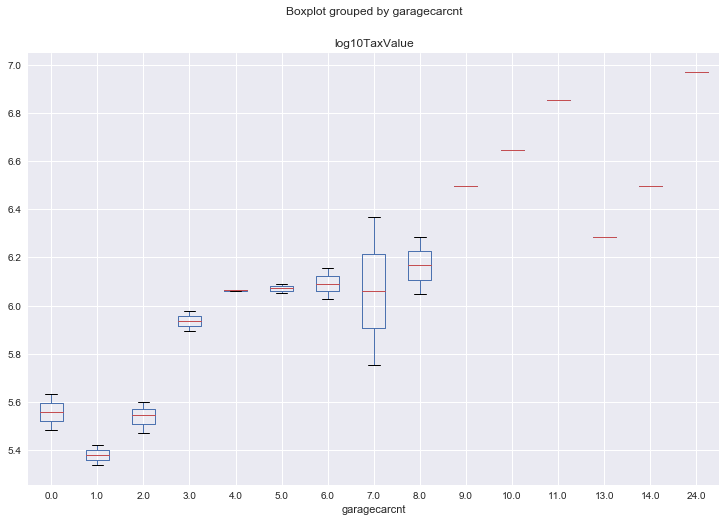

In [9]:
avgValuebyBath = dfForModel.groupby(['countyname', 'garagecarcnt'], as_index = False)['log10TaxValue'].mean()

#print(avgValuebyBath)

LAGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Los Angeles County']
OCGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County']
VentGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Ventura County'] 

#We see that the average value of homes without a garage is lower than ones with it. 

avgValuebyBath.boxplot('log10TaxValue', by='garagecarcnt', figsize=(12, 8))

import scipy.stats as stats

#print(avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County'])
garageCntZero = []
garageCntGTZero = []

garageCntZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] ==0].mean())

garageCntGTZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] > 0].mean())

#print(garageCntZero)
stats.f_oneway(LAGargageValue['log10TaxValue'], OCGargageValue['log10TaxValue'], VentGargageValue['log10TaxValue'])


##### Model 1A: Random Forrest Classification

The first model created is used to predict if a property has a garage or not with a Random Forrest classification model that takes the predictions made by multiple independent decision trees.  In order to minimize the processing time of the model, the number of decisions trees were limited to 50. This limits the number of decisions that are made in order to classify a property.  A Principal Component Analysis (PCA) was used within the model creation statement, limiting the possible components to 50.  

Using the train and test set split in the K-fold process, predictions were made with the model and resulted in an accuracy of 86.97%.  The graph below provides a visual represenation of the confusion matrix.  


/Users/joshuaklein/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


('Pipeline accuracy', 0.86890761901589098)


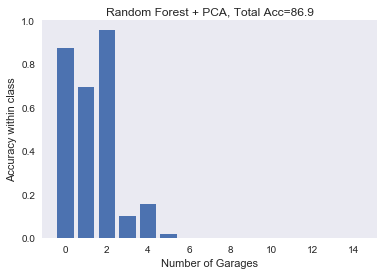

In [10]:
  
# we will fill this with predictions
yhat = np.zeros(garageActualValues.shape) 

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# scale attributes by the training set
stdsclrObjForGarage = StandardScaler()

# find scalings for each column that make this zero mean and unit std
# We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObjForGarage.fit(dfTrainValuesNumeric) 

RFC_pipe = Pipeline(
    [('PCAForRFC',PCA(n_components=50, svd_solver='randomized')),
     ('RFC',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):

    #Run the pipeline 
    RFC_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    
    #Get the results of the Test set
    yhat[test] = RFC_pipe.predict(garageAdditionalVars[test])
     
total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="Random Forest + PCA")

##### Model 1B: K Nearest Neighbors Classification

The Second Model was created using PCA and K Nearest Neighbors Classification, limiting the PCA to 100 components, and using the classification of a property based on the five (5) nearest neighbors of the property.  The accuracy of the K Nearest Neighbors Classification was 81.73%.   The graph below provides a visual represenation of the confusion matrix.  


('KNN, pipeline accuracy', 0.8149715161408535)


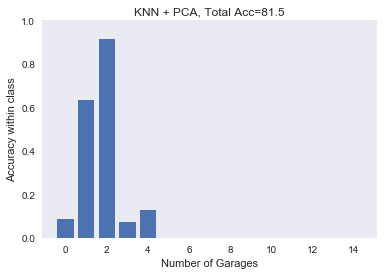

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# we will fill this with predictions
yhat = np.zeros(garageActualValues.shape) 

# setup pipeline to take PCA, then fit a KNN classifier
KNN_pipe = Pipeline(
    [('PCAForKNN',PCA(n_components=100,svd_solver='randomized')),
     ('KNN',KNeighborsClassifier(n_neighbors=5))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):

    #Run the pipeline 
    KNN_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    
    #Get the results of the Test set
    yhat[test] = KNN_pipe.predict(garageAdditionalVars[test])

total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('KNN, pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="KNN + PCA")

##### Model 1C: Support Vector Machine (SVM) Classification

Finally for task 1 the Support Vector Machine (SVM) Classifciation method was used.  This mainly utilized three parameters: kernel type, gamma, and a cost parameter.

The Kernel type parameter allows for the choice of 4 different kernels. These different kernels enables the model to do complex calculations for higher dimensional data in a very efficient way. Originally a linear kernel was used, which produced a larger amount of feedback once the regression was completed. Most importantly we had access to data that helped in the creation of the graphs that were included above.

The Gamma parameter helped the most in determining overfitting. In general, a high value of gamma leads to models that tend to have high bias and low variance. Therefore, the Gamma value was set equal to auto, which produced very good results. Interestingly enough, in attempting to change the Gamma value we found that the amount of time it took to produce a model was increased significantly. After multiple attempts, we chose to keep the Gamma value as auto.

The Cost parameter is a penalty parameter that corresponds to an error term. The cost parameter also controls the influence of each individual vector, which helps with the tradeoff between the smooth decision boundary and classifying the training dataset. It was found that by setting the cost to 1.0 the amount of time to complete the SVM model was almost 3 times higher than a lower cost of 0.05.

The accuracy of the final model was 82.16%.

In [12]:
#Create X and Y Train and Test Groups. 

for train_index, test_index in cv_object.split(garageAdditionalVars,garageActualValues):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = garageAdditionalVars[train_index], garageAdditionalVars[test_index]
    y_train, y_test = garageActualValues[train_index], garageActualValues[test_index]
    
print ('Test and Train Data Created')

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
stdsclrObj.fit(X_train) # find scalings for each column that make this zero mean and unit std

# to transform new feature data
# apply to training
X_train_scaled = stdsclrObj.transform(X_train)

# apply those means and std to the test set (without snooping at the test set values)
X_test_scaled = stdsclrObj.transform(X_test) 

print ('Scaled Data created')

#Run Support Vector Machine
from matplotlib import pyplot as svmplt
%matplotlib inline
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# train the model just as before
#more info on Support Vector Machines is at the website below.
#https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/


#change between the Kernal test ‘rbf’, ‘poly’, 'linear', ‘sigmoid’
#only linear will produce a graph below. 
kernelTest = 'linear'

#gamma: Kernel coefficient for . Higher the value of gamma
#will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
#gammaLevel needs to be a float can also be auto
#altering this from Auto will create much longer run times.
gammaLevel = 'auto'

#C is the cost variable 
#Penalty parameter C of the error term. 
#It also controls the trade off between smooth decision boundary and classifying the training points correctly.
cost = 0.05
#supportVectorCLF = SVC(C=cost, kernel=kernelTest, gamma = gammaLevel) # get object
supportVectorCLF = LinearSVC(C=cost, penalty = 'l2')
supportVectorCLF.fit(X_train_scaled, y_train)  # train object

y_hat = supportVectorCLF.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

Test and Train Data Created
Scaled Data created
('accuracy:', 0.81853024495917348)
[[  58    0    0    0    0    0    0    0    0    0    0    0]
 [   0  695  644    0    0    0    0    0    0    0    0    0]
 [   0  244 4154    2    0    0    0    0    0    0    0    0]
 [   0    0  129    2    2    0    0    0    0    0    0    0]
 [   0    1   45    3    3    0    0    0    0    0    0    0]
 [   0    0    7    2    1    0    0    0    0    0    0    0]
 [   0    0    2    1    0    0    0    0    0    0    0    0]
 [   0    0    1    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0]]


## Get Vector Values

('index value of ', 0, 'Variable Name: ', 'yearbuilt', 'has weight of', -0.28383905251383407)
('index value of ', 1, 'Variable Name: ', 'calculatedfinishedsquarefeet', 'has weight of', -0.24455880452680581)
('index value of ', 2, 'Variable Name: ', 'roomcnt', 'has weight of', -0.18976341548102546)
('index value of ', 3, 'Variable Name: ', 'lotsizesquarefeet', 'has weight of', -0.17396512883243706)
('index value of ', 4, 'Variable Name: ', 'bathroomcnt', 'has weight of', -0.16161811811372881)
('index value of ', 5, 'Variable Name: ', 'calculatedbathnbr', 'has weight of', -0.15947800641974355)
('index value of ', 6, 'Variable Name: ', 'latitude', 'has weight of', -0.11243595632414854)
('index value of ', 7, 'Variable Name: ', 'fireplacecnt', 'has weight of', -0.10312940052502913)
('index value of ', 8, 'Variable Name: ', 'LandUseTypeId_261.0', 'has weight of', -0.079931150682021043)
('index value of ', 9, 'Variable Name: ', 'log10TaxValue', 'has weight of', -0.074888593988779714)
('index

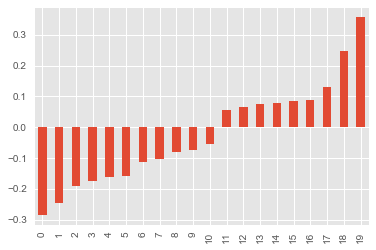

In [13]:
coefValues = zip(np.array(supportVectorCLF.coef_[1].T[np.newaxis]).T, dfTrainValuesNumeric)

    # sort these attributes and spit them out
coefValues = pd.DataFrame(sorted(coefValues))
    
    #keep all columns from dataframe with absolute values of .05 
dfValuesGTfive = coefValues.loc[abs(coefValues[0]) > .05]

    #Reset Index from removing data
dfValuesGTfive = dfValuesGTfive.reset_index(drop=True)

    #Remove any duplicate values from multiple runs
dfValuesGTfive = dfValuesGTfive.drop_duplicates([1], keep='last')

    # iterate over the Variable values
    #Get weight values
weights = dfValuesGTfive[0] 
    #Get Variable Names
variable_names = dfValuesGTfive[1]
    #Get Index count
indexes = dfValuesGTfive.index
    #Combined the data set and then print out results
for index, weight, name in zip(indexes, weights,variable_names):
    print('index value of ', index , 'Variable Name: ', name, 'has weight of', weight[0])

    #Due to the large number of variables we choose an absolute value of .15 as a cut off
    #Show all variables with an absolute value of greater than .15
plt.style.use('ggplot')
    #The commented line below give the correct labels, but not the correct values.
    #plotweights = pd.Series(dfValuesGTfive[0].astype(float), index=variable_names)
SVMweights = pd.Series(dfValuesGTfive[0].astype(float))
SVMweights.plot(kind='bar')
plt.show()


#### Task 2: Predicting the Tax Value of property

In the second task the tax value of a property was predicted. This was done by taking the data and running a Principal Component Analysis (PCA) on the data.  The Tax Value was normalized using a Common Log and then used to be predict the log Tax Value for each property.  The actual Tax Value was removed from the data set in order to prevent the models from predicting on a value that was a part of the calculation used to create the log Tax Value.


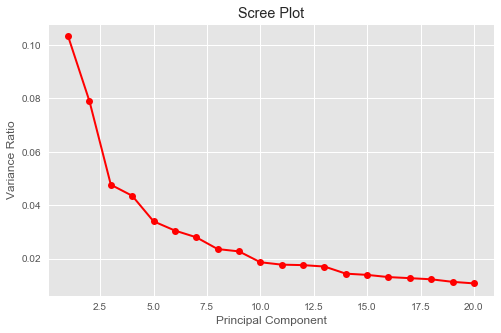

In [14]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 20

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [15]:
#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'log10TaxValue' in dfZillowDataNumeric:
    
    #Get the values for each property
    actualValues = dfZillowDataNumeric['log10TaxValue'].values 
    
    print('deleted')
    # get rid of the hasgarage variable
    del dfZillowDataNumeric['log10TaxValue'] 

    # Gather all values to use for prediction
    additionalVars = dfZillowDataNumeric.values  


#Create X and Y Train and Test Groups. 
for train_index, test_index in cv_object.split(additionalVars,actualValues):
    #Full dataset
    X_train = additionalVars[train_index]
    X_test = additionalVars[test_index]
    
    #Target Values
    y_train = actualValues[train_index]
    y_test = actualValues[test_index]
    
print ('Test and Train Data Created')


deleted
Test and Train Data Created


##### Model 2A: Linear Regression


The first model created was done using a linear regression which takes the relationship of explanatory variables and the different Principal components, to determine which variables could best be used to predict the value of the response variable, the log Tax Value.  Linear Regression has assumptions built into the model.  First, that there is a normally distributed subpopulation of responses along the explanatory variables; we addressed this by predicting the log Tax Value, a normalized value of Tax Value.  Second, there is an assumption of linearity correlation between the response variable and the explanatory variables.  Third, there is constant variance of the response variable for each explanatory variable.  Finally, the assumption of independence, in which each instance, in our data set property, is measured independently from other instances. 

We used the fit function from the linearReg from sklearn.model_selection to create the linear regression model for the training data set.  This uses all the variables presented in the modeling statement to create the model.  For the purpose of our model this would include all the measures in y_train data set.  

The R-Squared value for this model was determined to be 0.582, meaning that it explains almost 60% of the variance in the response variable, log Tax Value.

('Training Data R2 value:', 0.58201099314968041)


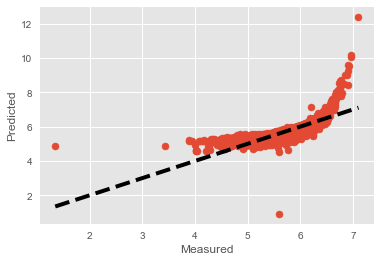

In [16]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score

#Create Linear Regression Object
linearReg = LinearRegression()

# train object
linearReg.fit(X_train,y_train)  

# get test set precitions
y_hat = linearReg.predict(X_test)

r2TrainScore = linearReg.score(X_train,y_train)
print('Training Data R2 value:', r2TrainScore)

#Find prediction values
predictedAcc = cross_val_predict(linearReg, X_test, y_test, cv = cv_object)

#Create a graph showing the results of the linear regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedAcc)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


##### Model 2B: Lasso Regression

The second model used a least absolute shrinkage and selection operator (LASSO) regression. Lasso is another linear model that is best at estimating sparse coefficients. It is used in most cases where there is a preference for solutions with fewer parameters. In effect, minimizing the number of variables upon which the given solution is dependent. Lasso and its variants are fundamental to the field of compressed sensing.

Lasso’s linear model is trained with l1 prior as the regularizer and attempts to minimize the least-squared penalty function with a weight based on the l1-norm of the parameter vector. 

In this case using Lasso and these parsed down variables gives a very similar R-Squared value similar to that of the linear model and explains approximately 60% of the varaince in response variable.

('R2 on test data', 0.59791050220974806)


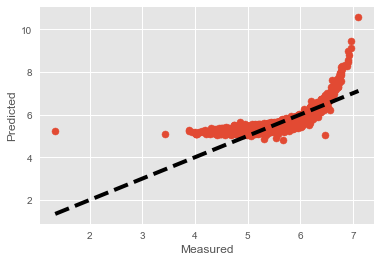

In [19]:
from sklearn.linear_model import Lasso

alpha = 0.05
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
predictedValuesLasso = lasso.predict(X_test)

r2_score_lasso = r2_score(y_test, predictedValuesLasso)

print("R2 on test data",r2_score_lasso)

#Create a graph showing the results of the Lasso Regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValuesLasso)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Model 2C: Elastic Net Regression

Our final model is uses an elastic net regression which works to over come some of the limitations of LASSO.  In LASSO regression the size of the regression coefficients are penalized based on their l1 norm. Limitations with using LASSO include the number of variables selected is bounded by the number of observations. LASSO also does not do grouped selections well and will chose one variable from a group and ignore the others. To overcome these limitations, elastic net was created that penalizes based on the l1 norm of LASSO as well as the l2 norm of ridge regression. The end result is the creation of a sparse model with good prediction accuracy using l1 norm combined with a grouping effect that comes from the l2 norm. In most cases elastic net should perform better than LASSO, but at the cost of a higher computational expense.

The final modles, again, explains approximately 60% of the varaicne in the log Tax Value.

('R2 on test data', 0.60915743962682634)


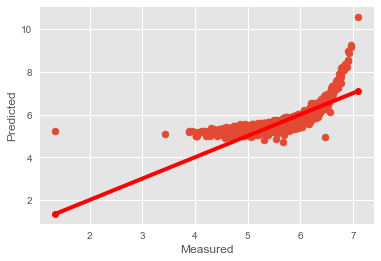

In [20]:
from sklearn.linear_model import ElasticNet

ENetReg = ElasticNet(alpha=alpha, l1_ratio=0.10)

ENetReg.fit(X_train, y_train)

predictedValuesElasticNet = ENetReg.predict(X_test)

r2_score_enet = r2_score(y_test, predictedValuesElasticNet)

print("R2 on test data", r2_score_enet)

#Create a graph showing the results of the linear regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValuesElasticNet)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-ro', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



### Modeling and Evaluation Part 4: Results

For Task 1 we see that the three models have the following accuracy scores:

|Model  |Type           |Score   |
|-------|---------------|--------|
| 1A    |Random Forrest | 86.97  |
| 1B    |KNN            | 81.49  |
| 1C    |SVM            | 82.16  |

From these we can see that all three models provide approximatly the same accuracy when classifying properties into having or not having a garage.  Model 1A, the Radom Forest model, does provide slightly better classifications than the other two.  

For Task 2 we reviewed R-squared values from the different regression models that used different selection methods.  

|Model  |Type              |R-squared|
|-------|------------------|---------|
| 2A    |Linear Regression | 58.20   |
| 2B    |LASSO             | 59.79   |
| 2C    |Elastic Net       | 60.91   |

Here based on the R-squared values no single model seems to really explain the variation of the log Tax Value better than the other two, with all three models explaining approximately 60% of the varaince. 

## Plot of Linear vs Lasso vs Elastic

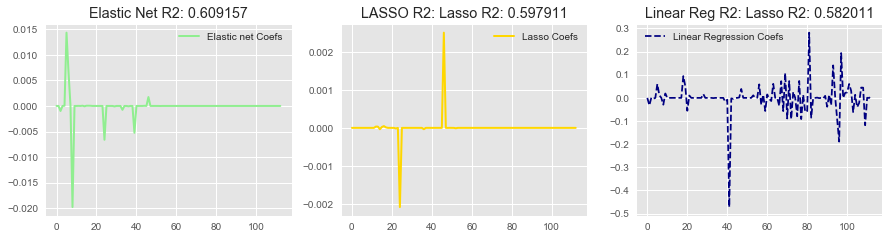

In [21]:
f, ax = plt.subplots(figsize=(15, 12))

f.title = plt.title("Linear Reg R2: Lasso R2: %f, Elastic Net R2: %f"
          % (r2_score_lasso, r2_score_enet))

plt.subplot(3,3,1)
plt.plot(ENetReg.coef_, color='lightgreen', linewidth=2,label='Elastic net Coefs')
plt.legend(loc='best')
plt.title("Elastic Net R2: %f"% (r2_score_enet))

plt.subplot(3,3,2)
plt.plot(lasso.coef_, color='gold', linewidth=2,label='Lasso Coefs')
plt.legend(loc='best')
plt.title("LASSO R2: Lasso R2: %f"% (r2_score_lasso))

plt.subplot(3,3,3)
plt.plot(linearReg.coef_, '--', color='navy', label='Linear Regression Coefs')
plt.legend(loc='best')
plt.title("Linear Reg R2: Lasso R2: %f"% (r2TrainScore))

### Modeling and Evaluation Part 5: Model Advantages

#### Task 1

Random Forrest has the advantage over the other two models as it provides the best accuracy score.  It is noteworthy, that while SVM had the second highest accuracy score that the computational time required to run the model, makes the slight advantage in accuracy over the KNN not worth the time for the extra accuracy.  There was no detectable difference in computational time between the Random Forrest and KNN models.  Both modeling techniques take into concern different values for the classification.  Random Forrest will take the decisions from multiple decision trees to find the "best" prediction and KNN will use the other objects closet to the object being predicted to determine the classification.  

In the case of Task 1, as a group, we feel that the Random Forrest model has the advantage over the other two for our purpose.

#### Task 2

There was no discernible difference in the computation times for each of the models created in Task 2.  While the selection criteria are different for each model, there appears to be no discernible advantage for any one of our models as they all explain approximately the same amount of variance in the response variable, log Tax Value.  


### Modeling and Evaluation Part 6: Important Attributes

what attributes are important and why, use proper terms and methods as discussed in class

Per Jake if we keep the PC form PCA we are good here.  

hypthosis on why some attributes are more important that others


## Deployment

Looking at all the models independently, the models created in task 2 would have more applicability to third parties than those created in task 1 due to more the practical nature of the response variable in question.

The response variable in task 1 is if a parcel in question has a garage and has limited use to consumers of real estate data in a classical sense. Cars are abundant in California with the EPA showing 840 cars per 1,000 people. With such high ownership rate most investors looking for personal real estate might already assume that a garage already exists, even though the data shows that is not the case. From our own personal experiences as homebuyers we all agree that while knowing if a property has a garage is important, it is the number of cars that can fit into the garage that provides the most benefit in evaluating a property. The lack of this specificity in the data makes having a garage only partially appealing.

Task 2 has a response variable of tax value which has very broad appeal to real estate, government, and certain businesses. Individual buyers will more than likely have a budget in mind when finding real estate and long term investors might look to home price trends to identify both overvalued and undervalued properties. Tax values can be used as a proxy for market value and certain assumptions for overall health of the real estate market can be made using tax values where a market value does not exist. Governmental agencies such as a regional appraisal district can make use of a tax value prediction model to scale efficiencies for property tax appraisal work that goes on each year. Insurance companies would also be a potential user of these models to make sure they are aligning premiums and risks to the tax values.

The supporting data that we used originally supplied by Zillow contains data points that can be pulled into a database from Zillow and other real estate systems using API calls. Automation of these API calls would enable an entity to create a machine learning program utilizing the most up to date values. Real estate investors could create a program that predicts overall tax values at a set frequency and then store the results in a database for trending purposes. Value is generated by looking at tax values and how they increase or decrease over time to signal a buy/sell opportunity. Governments can utilize the information to visualize tax value trends and provide better civic planning. For example: areas that start to show increasing values might attract new development and therefore additional infrastructure needs. Areas with declining values could need infrastructure improvements or possibly have issues with crime or pollution. Finally, insurance companies can use trending to get ahead of changing tax values and adjust their premiums in a more dynamic, real-time manner.



## Exceptional Work

if we can do it we can use the PCA principal compentents and break them out to the individual features and why we think they are helpful.  Jake stated Scree plots for each of the PC's.